In [0]:
import pandas as pd

In [0]:
PATH = 'Scam.csv'
df = pd.read_csv(PATH)
df.head()

,Unnamed: 0,Unnamed: 0.1,Tweet_id,name,id,location,text,sentiment,age,gender,date,time,race,score,screen_name
0,0,0,1243234186049314800,Hosea Bigirwenkya,319059357,NaN,My sister is doing covid19 intubations all day...,Negative,>40,Male,Mar26,17:51:42,"GreaterEuropean,EastEuropean",-0.6289,hoseakb
1,1,1,1246371006375063600,Tania Britto Amaral,974765978520207360,NaN,"“America is not prepared, and nurses are not b...",Negative,>40,Female,Apr04,09:36:19,"Asian,IndianSubContinent",-0.3749,AmaralBritto
2,2,2,1246501927132835800,"Sana ""good & normal"" Birbza 🐥",2597132532,go͜ʖod & no͜ʖormal town,Now that the CDC recommends that everyone wear...,Positive,>40,Female,Apr04,18:16:32,"Asian,IndianSubContinent",0.7088,sanabirbza
3,3,3,1246361471296188400,Rachel McRea 🏳️‍🌈,122280853,"Tuscaloosa, AL",This is where we're at in buying PPE.\n\nAn Il...,Negative,30-39,Female,Apr04,08:58:25,"GreaterEuropean,British",-0.4588,Rachel_McRea
4,4,4,1242149459221504000,Organique #StayHome #BernieIsOurFDR,264623333,"Cape Town, South Africa",Delusional. Nurses are being advised by the CD...,Negative,>40,Female,Mar23,18:01:23,"GreaterEuropean,WestEuropean,Hispanic",-0.5537,Organique


In [0]:
import seaborn as sns
from pandas.api.types import is_datetime64_any_dtype

#change date column to date object
for i, row in df.iterrows():
  # Convert to string
  date = str(df.at[i, 'date'])
  if ('Apr' in date):
     df.at[i, 'date'] = "2020-" + "04-" + date[3:5]
  elif ('Mar' in date):
    df.at[i, 'date'] = "2020-" + "03-" + date[3:5]

# Convert to date time obj.
df['date'] = pd.to_datetime(df['date'])
print(is_datetime64_any_dtype(df['date']))

# Sort by date
df = df.sort_values('date')

# reset the index after sorting
df = df.reset_index(drop=True)
df.head()

True


,Unnamed: 0,Unnamed: 0.1,Tweet_id,name,id,location,text,sentiment,age,gender,date,time,race,score,screen_name
0,4,4,1242149459221504000,Organique #StayHome #BernieIsOurFDR,264623333,"Cape Town, South Africa",Delusional. Nurses are being advised by the CD...,Negative,>40,Female,2020-03-23,18:01:23,"GreaterEuropean,WestEuropean,Hispanic",-0.5537,Organique
1,15,15,1242626431286468600,Metal Mixtress Ⓡ,2296859240,NaN,AT_USER Why are you forcing states to bid agai...,Neutral,19-29,Female,2020-03-25,01:36:42,"GreaterEuropean,British",0.0000,Metal_Mlxtress
2,0,0,1243234186049314800,Hosea Bigirwenkya,319059357,NaN,My sister is doing covid19 intubations all day...,Negative,>40,Male,2020-03-26,17:51:42,"GreaterEuropean,EastEuropean",-0.6289,hoseakb
3,10,10,1243551350425882600,dpfaff,483021402,NaN,"BREAKING: Dr. Fauci says “Right now, today, as...",Negative,>40,Male,2020-03-27,14:52:00,"GreaterAfrican,Muslim",-0.5867,PfaffSC
4,9,9,1243556341760876500,jholbrook,10718012,"Buffalo, NY",We now know Trump was briefed on th coming Cor...,Negative,>40,Female,2020-03-27,15:11:50,"GreaterEuropean,British",-0.7469,jholbrook


In [0]:
# initial date is the first one
date = df.at[0, 'date']
print(date)

# init empty list
ranges = [0]
dates = []

# append the first date
dates.append(date)

# iterate all rows
for i, row in df.iterrows():
  # if unique
  if (df.at[i, 'date'] != date):
    # change the date
    date = df.at[i, 'date']

    # add the date to unique dates
    dates.append(date)
    
    # add the index of the change in rows
    ranges.append(i)

    print("date changes " + str(date) + "at index" + str(i))

# append the last range
ranges.append(len(df)-1)

# print
print(ranges)
print(dates)

# They now match up in length
print(str(len(ranges)))
print(str(len(dates)))

2020-03-23 00:00:00
date changes 2020-03-25 00:00:00at index1
date changes 2020-03-26 00:00:00at index2
date changes 2020-03-27 00:00:00at index3
date changes 2020-03-28 00:00:00at index6
date changes 2020-03-29 00:00:00at index7
date changes 2020-03-30 00:00:00at index8
date changes 2020-03-31 00:00:00at index9
date changes 2020-04-02 00:00:00at index11
date changes 2020-04-03 00:00:00at index12
date changes 2020-04-04 00:00:00at index14
[0, 1, 2, 3, 6, 7, 8, 9, 11, 12, 14, 16]
[Timestamp('2020-03-23 00:00:00'), Timestamp('2020-03-25 00:00:00'), Timestamp('2020-03-26 00:00:00'), Timestamp('2020-03-27 00:00:00'), Timestamp('2020-03-28 00:00:00'), Timestamp('2020-03-29 00:00:00'), Timestamp('2020-03-30 00:00:00'), Timestamp('2020-03-31 00:00:00'), Timestamp('2020-04-02 00:00:00'), Timestamp('2020-04-03 00:00:00'), Timestamp('2020-04-04 00:00:00')]
12
11


In [0]:
# Tally up the sentiment
sentiments = []

# Ranges
# 1, 2, 3
# 
for i in range(0, len(ranges)-1):
  start = ranges[i]
  end = ranges[i + 1]
  print("sentiment from " + str(start) + " to " + str(end))
  sum_sentiments = 0
  for k in range(start, end):
    sum_sentiments += df.at[k, 'score']
    print("running sum of sentiments is: " + str(sum_sentiments))
  
  avg_sentiment = sum_sentiments / (abs(start-end))
  print("average sentiment is " + str(avg_sentiment) + " for " + str(start) + " to " + str(end))
  sentiments.append(avg_sentiment)
  print("---------------------------------------")
print(sentiments)

print(str(len(sentiments)))


sentiment from 0 to 1
running sum of sentiments is: -0.5537
average sentiment is -0.5537 for 0 to 1
---------------------------------------
sentiment from 1 to 2
running sum of sentiments is: 0.0
average sentiment is 0.0 for 1 to 2
---------------------------------------
sentiment from 2 to 3
running sum of sentiments is: -0.6289
average sentiment is -0.6289 for 2 to 3
---------------------------------------
sentiment from 3 to 6
running sum of sentiments is: -0.5867
running sum of sentiments is: -1.3336000000000001
running sum of sentiments is: -1.0836000000000001
average sentiment is -0.3612 for 3 to 6
---------------------------------------
sentiment from 6 to 7
running sum of sentiments is: -0.7695
average sentiment is -0.7695 for 6 to 7
---------------------------------------
sentiment from 7 to 8
running sum of sentiments is: 0.4939
average sentiment is 0.4939 for 7 to 8
---------------------------------------
sentiment from 8 to 9
running sum of sentiments is: -0.8773
average se

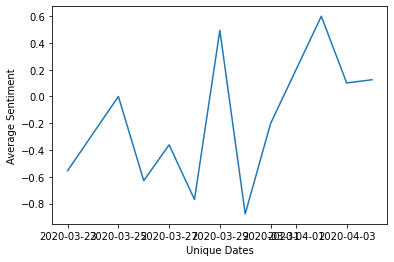

In [0]:
df1 = pd.DataFrame(dates, columns = ["Unique Dates"])
df2 = pd.DataFrame(sentiments, columns = ["Average Sentiment"])

df3 = pd.concat([df1, df2], axis = 1)
df3.head()

# seaborn plot
plot = sns.lineplot(x = "Unique Dates", y = "Average Sentiment", data = df3)


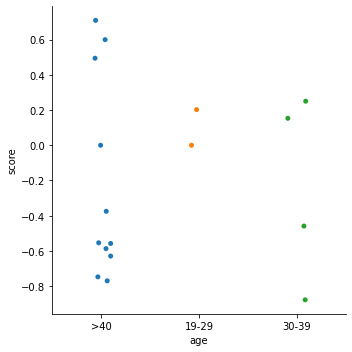

In [0]:
# To do: order
df4 = pd.concat([df["age"], df["score"]], axis = 1)
df4.head()
sns.catplot(x = "age", y = "score", data = df4)

# Age v sentiment
# Group all sentiments by age
# Add them up


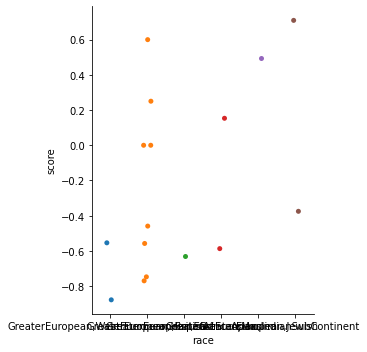

In [0]:
df5 = pd.concat([df["race"], df["score"]], axis = 1)
df5.head()
sns.catplot(x = "race", y = "score", data = df5)